In [2]:
%cd ..

/home/ead/iking5/code/CASTLE


In [3]:
from collections import defaultdict
import matplotlib.pyplot as plt 
import pickle

In [4]:
with open('logs/ppo_actions.pkl', 'rb') as f:
    acts = pickle.load(f)

for k,v in acts.items():
    print(k,v)

<class 'CybORG.Agents.SimpleAgents.B_line.B_lineAgent'> {'DecoyFemitter User2': 1868, 'DecoyFemitter Enterprise1': 1269, 'DecoyHarakaSMPT Enterprise0': 617, 'DecoyTomcat User2': 2021, 'Restore Enterprise1': 451, 'DecoySmss Enterprise1': 6, 'Remove Op_Host2': 130, 'DecoyTomcat Op_Server0': 1105, 'DecoyApache Enterprise0': 1119, 'DecoyFemitter Op_Host0': 445, 'DecoyTomcat Enterprise0': 1000, 'DecoyFemitter User1': 1103, 'Remove Enterprise2': 1528, 'Restore Enterprise0': 229, 'Analyse User1': 282, 'Analyse User0': 1401, 'DecoyHarakaSMPT User1': 2393, 'DecoySmss Enterprise2': 25, 'DecoyApache Enterprise2': 726, 'DecoyVsftpd User4': 205, 'Restore Enterprise2': 5, 'DecoySvchost Enterprise1': 2, 'DecoySvchost Op_Host0': 67, 'DecoyFemitter Enterprise0': 3}
<class 'CybORG.Agents.SimpleAgents.Meander.RedMeanderAgent'> {'DecoyFemitter User2': 1837, 'DecoyHarakaSMPT Enterprise0': 326, 'DecoyApache Enterprise0': 202, 'DecoyFemitter Enterprise1': 456, 'DecoyTomcat Enterprise0': 989, 'DecoyVsftpd Ent

In [5]:
key_str = lambda k : str(k).split('.')[-1][:-2]

def compress_vals(vals):
    '''
    Formats dicts for use in plt.pie()
    '''
    compressed = defaultdict(lambda : 0)
    for k,v in vals.items():
        # Strip out hostname
        true_k = k.split(' ')[0]
        compressed[true_k] += v 

    names, cnts = [],[]
    for k,v in compressed.items():
        names.append(k)
        cnts.append(v) 

    tot = sum(cnts)
    cnts_ = [(c/tot) * 100 for c in cnts]

    return names,cnts_

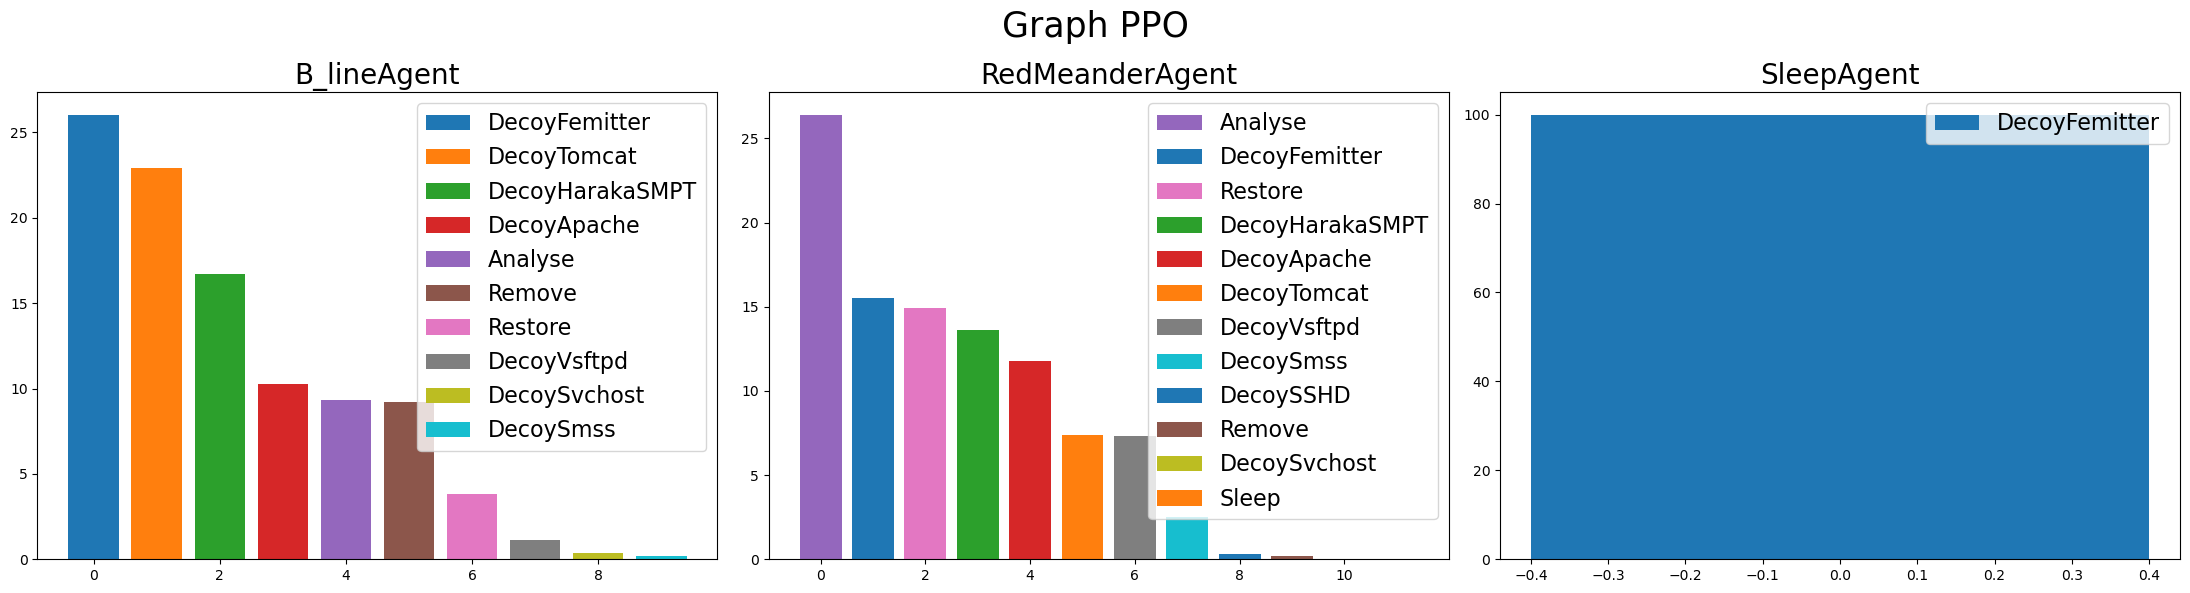

In [8]:
import numpy as np 

fig, axes = plt.subplots(1,3)
fig.set_figwidth(22)
fig.set_figheight(6)
fig.suptitle("Graph PPO", fontsize=25)

consistant_colors = dict()
i = 0
for k,v in acts.items():
    ax = axes[i]
    
    name,cnt = compress_vals(v)
    cnt = np.array(cnt)
    
    order = cnt.argsort()
    cnt.sort()
    name = [name[i] for i in order]

    cnt = np.flip(cnt)
    name.reverse()

    for j in range(len(cnt)):
        if name[j] not in consistant_colors: 
            consistant_colors[name[j]] = len(consistant_colors)
        color_idx = consistant_colors[name[j]]
        
        ax.bar(j, cnt[j], label=name[j], color=f'C{color_idx}')

    ax.set_title(key_str(k), fontsize=20)
    ax.legend(fontsize=16)
    i += 1 

fig.tight_layout()
plt.show()